## CS441: Applied ML - HW 1

### Part I: MNIST Classification

Include all the code for Part 1 in this section

In [100]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from numpy import linalg as la

# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

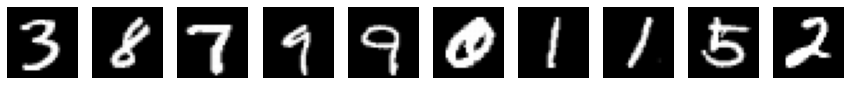

(10000, 784)
Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [97]:
# example of using MNIST load, display, indices, and count functions
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
display_mnist(x_train[:10],1,10)
print(x_test.shape)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

In [98]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. 
         X_tst[i] is the ith example to classify.  K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  # needs code here
  y_pred = []
  for elem in X_tst:
    smallest = float('inf')
    index = -1
    for i in range(len(X_trn)):
      value = la.norm(np.abs(elem - x_train[i]), 2)
      if value < smallest:
        smallest = value
        index = y_trn[i]
    y_pred.append(index)
  
  y_pred = np.array(y_pred)
  return y_pred



In [96]:
# This is a suggested function definition for training Naive Bayes, but feel free to change it
def train_NB_mnist(X, y, alpha=1):
  '''
  Train P(x_f=v|y=c) for each feature f, value v, and class c.  Can assume 10 classes and that the features are binary variables 
  Input: X[i] is the ith training data. y[i] is the ith training label. alpha is the count prior
  Output: return pxy of shape (Nf, 10, 2), where Nf is the number of features; pxy[f,c,v] is P(x_f=v|y=c) 
  '''
  # needs code here
  n_data = len(X)
  n_feature = len(X[0])
  labels = list(set(y))
  n_labels = len(set(y))
  for i in range(n_data):
    for j in range(n_feature):
      if X[i,j] > 0.5:
        X[i,j] = 1.00000
      else:
        X[i,j] = 0.000000
  pxy1 = []
  for i in range(n_labels):
    label = labels[i]
    fit_data = []
    for j in range(n_data):
      if y[j] == label:
        fit_data.append(X[j])
    number_fits = len(fit_data)
    fit_data = np.array(fit_data)
    total = np.sum(fit_data, axis = 0)
    for k in range(len(total)):
      total[k] = (total[k] + alpha) / (number_fits 
      + n_feature * alpha)
    pxy1.append(total)
  pxy1 = np.array(pxy1)
  pxy = pxy1
  return pxy

# This is a suggested function definition for evauating Naive Bayes, but feel free to change it
def eval_NB_mnist(pxy, X):
  y_pred = []
  for i in range(len(X)):
    data = X[i]
    probs = []
    for j in range(len(pxy)):
      prob = pxy[j] @ data
      probs.append(prob)
    probs = np.array(probs)
    label = np.argmax(probs)
    y_pred.append(label)
  return y_pred

  '''
  Evaluate naive bayes for mnist
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test label  
  '''



In [95]:
# don't forget logistic regression!
from sklearn.linear_model import LogisticRegression

def log_reg(x_train, y_train, x_test):
  logR = LogisticRegression(max_iter=100000)
  logR.fit(x_train, y_train)
  y_pred = logR.predict(x_test)
  return y_pred


In [108]:
# experiments code
# display_mnist(x_test,1,10000)
# X_trn = x_train[0:5]
# Y_trn = y_train[0:5]
# X_tst = x_test

# def func(matrix, value, y_pred, y_val):
#   for i in range(10000):
#     row = y_val[i] ## should be i
#     col = y_pred[i] ## the label we get is matched or not
#     confusion[row][col] += 1  ## the diagonal will be the correctness
#     if y_pred[i] != y_val[i]:
#       value += 1
#   return value, confusion

# knn
# y_pred = classify_KNN(X_trn, Y_trn, x_val, K=1)
# confusion = np.zeros((10,10))
# count = 0
# count, confusion = func(confusion, count, y_pred, y_val)
# print(confusion)
# naive bayes

# pxy = train_NB_mnist(X_trn, Y_trn, 1)
# y_pred = eval_NB_mnist(pxy, X_tst)
# count = 0
# for i in range(10000):
#   if y_pred[i] != y_test[i]:
#     count = count + 1
# print(count / 10000)



# logistic

# y_pred = log_reg(x_train, y_train, X_tst)
# count = 0
# for i in range(10000):
#   if y_pred[i] != y_test[i]:
#     count = count + 1
# print(count / 10000)
# print(y_pred)


## Part 2: Temperature Regression

Include all your code for part 2 in this section.  You can copy-paste code from part 1 if it is re-usable.

In [61]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive/')
  datadir = "/content/drive/MyDrive/cs441/hw1/" 
  T = np.load(datadir + "temperature_data.npz")
  x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target temperature
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Feature 361: city = Cleveland, day= -1
Baseline - predict same as previous day: RMSE=3.460601246750482, MAE=1.3964240043768943


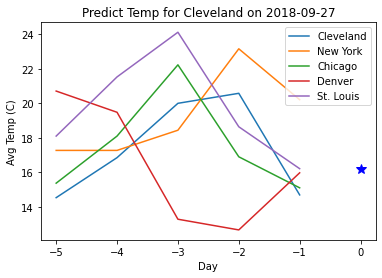

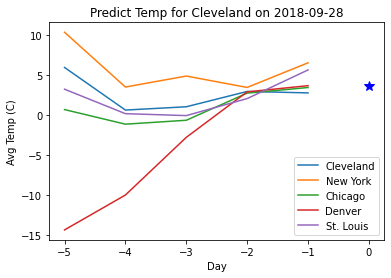

In [62]:
# load data (may need to modify file location in preceding cell)
(x_train, y_train, x_val, y_val, x_test, y_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()

# example of displaying information related to a feature index
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))

# example of computing RMSE and median absolute error (for baseline of predicting based on previous day's temperature in Cleveland)
baseline_rmse = np.sqrt(np.mean((y_val[1:]-y_val[:-1])**2)) # root mean squared error
baseline_mae = np.sqrt(np.median(np.abs(y_val[1:]-y_val[:-1]))) # median absolute error
print('Baseline - predict same as previous day: RMSE={}, MAE={}'.format(baseline_rmse, baseline_mae))

# plots temperatures for preceding days for given cities, and target (Cleveland) temp
plot_temps(x_val[0], y_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(x_val[100], y_val[100], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# This is a suggested function definition for KNN, but feel free to change it
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Classify each data point in X_tst using a K-nearest neighbor classifier based on (X_trn, y_trn), with L2 distance.   
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test label 
  '''
  # needs code
  n = len(X_trn)
  y_pred = []
  for value in X_tst:
    temp = []
    pred_y = 0
    for i in range(n):
      distance = la.norm(X_trn[i] - value) 
      temp.append(distance)
    temp = np.array(temp)
    choose = np.argsort(temp)
    sum = y_trn[choose[0]] + y_trn[choose[1]] + y_trn[choose[2]]
    pred_y = sum / 3
    y_pred.append(pred_y)
  return y_pred


In [70]:
# Suggested function definition for NB for temperature regression, but feel free to change 
def train_NB_temp(X, y, std_prior=0):
  '''
  Train NB, assuming that X[f]-y is a Gaussian
  Input: X[i] is the ith training data. y[i] is the ith training label. std_prior is a value to add to std
  Output: return pxy['mu'] and pxy['std'] each with number of values equal to number of features
  '''
  # needs code
  n_features = len(X[0])
  pxy = np.zeros((2, n_features))
  for i in range(n_features):
    temp = np.mean(y - X[:, i], axis=0)
    temp2 = np.std(y - X[:, i], axis=0) + std_prior
    pxy[0][i] = temp
    pxy[1][i] = temp2
  return pxy

def eval_NB_temp(pxy, X):
  '''
  Evaluate naive bayes for temp
  Input: pxy is the trained model; X is the test data
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # needs code
  n_data = len(X)
  y_pred = []
  for i in range(n_data):
    temp = (1/np.sum(1/pxy[1]**2))
    temp2 = np.sum((X[i]+pxy[0])/pxy[1]**2)
    total = temp * temp2
    y_pred.append(total)
  return y_pred

In [69]:
# Don't forget linear regression!
from sklearn.linear_model import LinearRegression

def linear_reg(x_train, y_train, x_test):
  linearR = LinearRegression()
  linearR.fit(x_train, y_train)
  y_pred = linearR.predict(x_test)
  return y_pred

In [83]:
# Feature analysis
from sklearn import linear_model
temp = linear_model.Lasso() 
temp.fit(x_train, y_train)
y_pred = temp.predict(x_val)
temp1 = np.argsort(abs(temp.coef_))[:10]
argsort_vector = temp1[::-1]
x_new_train = np.zeros((len(x_train), 10)) 
x_new_val = np.zeros((len(x_val), 10))
for i in range(10):
  idx = argsort_vector[i]
  print("index: " + str(idx) + " city: " + feature_to_city[idx] + " day: " + str(feature_to_day[idx])) 
  x_new_train[:,i] = x_train[:,idx]
  x_new_val[:,i] = x_val[:, idx]

# experiment code
# knn
# y_pred = classify_KNN(x_train, y_train, x_val , K = 3)

# Naive bayes
# pxy = train_NB_temp(x_train, y_train, 0)
# y_pred = eval_NB_temp(pxy, x_val)


# linear regression
# y_pred = linear_reg(x_train, y_train, x_val)
# rmse = np.sqrt(np.mean((y_pred-y_val)**2))
# mae = np.sqrt(np.median(np.abs(y_pred-y_val))) 
# print(rmse)
# print(mae)

index: 269 city: Baltimore day: -2
index: 270 city: Riverside day: -2
index: 271 city: St. Louis day: -2
index: 272 city: Las Vegas day: -2
index: 273 city: Portland day: -2
index: 274 city: San Antonio day: -2
index: 275 city: Sacramento day: -2
index: 276 city: San Jose day: -2
index: 277 city: Orlando day: -2
index: 0 city: New York day: -5
2.444692756154613
1.2823643380425092


## Part 3: Stretch Goals
Include all your code used for part 3 in this section. You can copy-paste code from parts 1 or 2 if it is re-usable.